In [92]:
import pandas as pd

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [93]:
countries=df['country']
df = df.drop(['country'], axis=1)

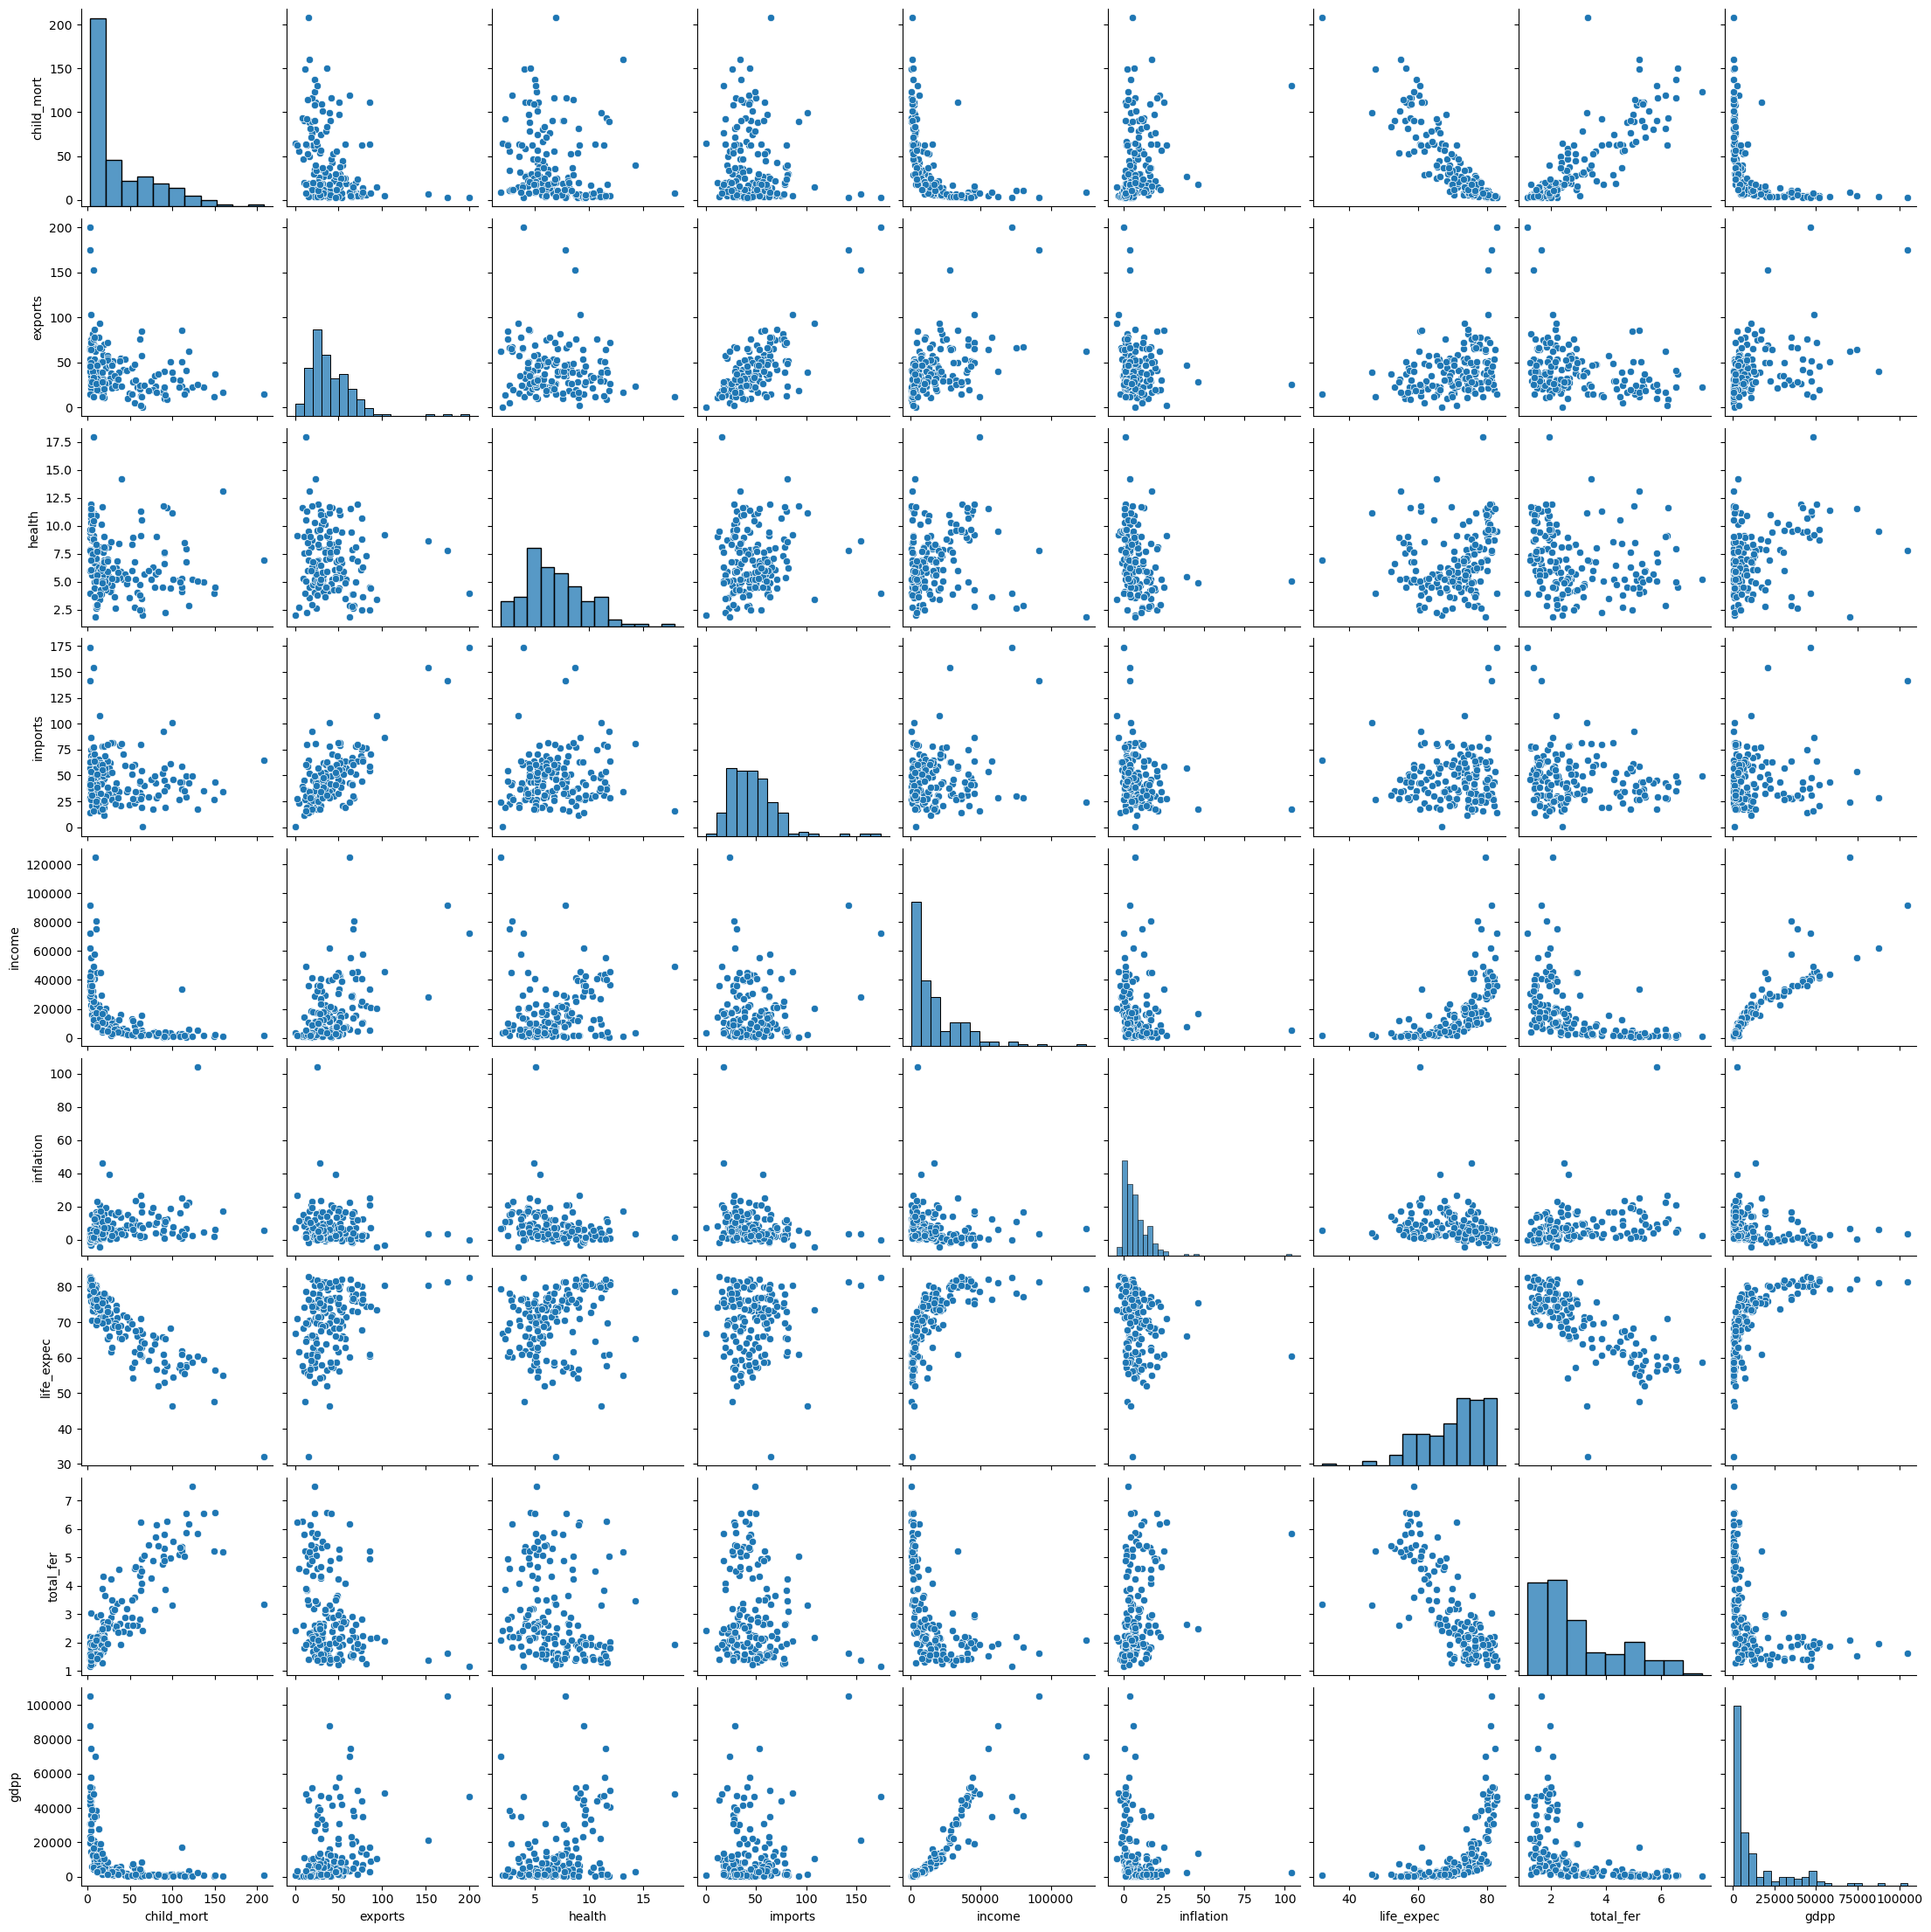

In [94]:
import seaborn as sns
sns.pairplot(df)

/opt/homebrew/Caskroom/miniconda/base/envs/torch_ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

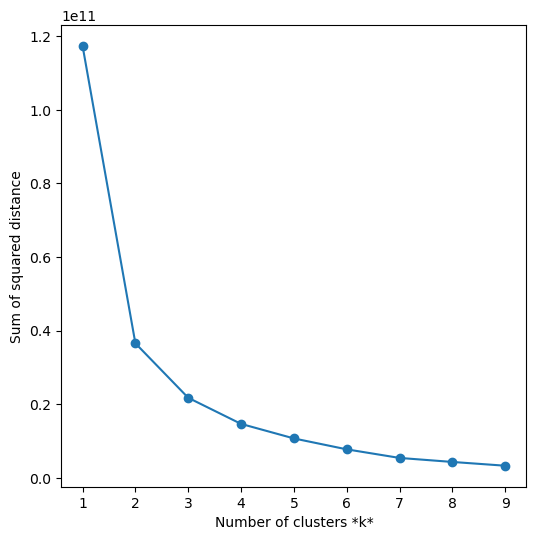

In [95]:
# ellbow method
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');



In [96]:
# clustering with k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
kmeans.labels_

kmeans_df=pd.DataFrame(kmeans.labels_,columns=['kmeans'])
kmeans_df["country"]=countries
kmeans_df.sample(30)

/opt/homebrew/Caskroom/miniconda/base/envs/torch_ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,kmeans,country
43,2,Czech Republic
112,1,Niger
31,1,Central African Republic
7,2,Australia
44,2,Denmark
34,1,China
140,1,Sri Lanka
27,1,Cambodia
108,1,Namibia
49,2,Equatorial Guinea


In [97]:
df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
52,24.1,57.8,4.86,63.9,7350,4.23,65.3,2.67,3650
149,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3600
161,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
147,71.9,18.7,6.01,29.1,2090,9.25,59.3,5.43,702
112,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
71,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
81,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1490
111,6.2,30.3,10.10,28.0,32300,3.73,80.9,2.17,33700
166,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
136,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1290


In [98]:
# plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)


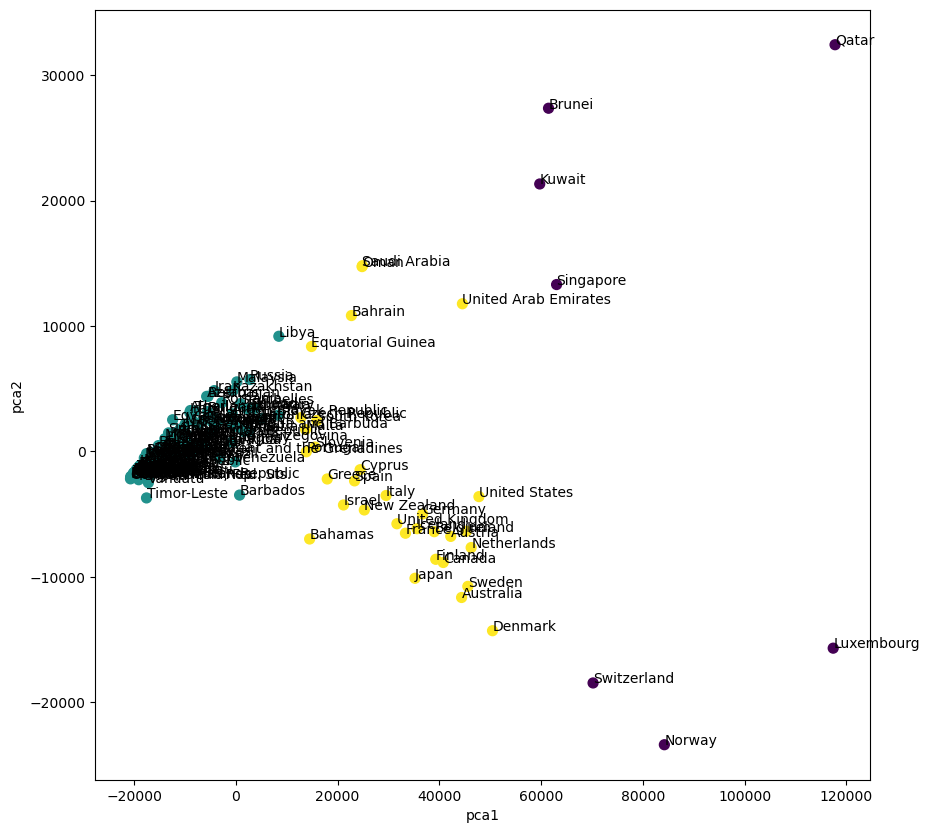

In [99]:
df_temp=df.copy()
df_temp['country']=countries
df_temp["pca1"]=pca_2d[:, 0]
df_temp["pca2"]=pca_2d[:, 1]
df_temp["kmeans"]=kmeans.labels_
df_sample=df_temp

# plot the 30 countries based in pca coordinates
plt.figure(figsize=(10, 10))
plt.scatter(df_sample['pca1'], df_sample['pca2'], c=df_sample['kmeans'], s=50, cmap='viridis')
plt.xlabel('pca1')
plt.ylabel('pca2')
for i, txt in enumerate(df_sample['country']):
    plt.annotate(txt, (df_sample['pca1'].iloc[i],df_sample['pca2'].iloc[i]))
plt.show()

<Axes: >

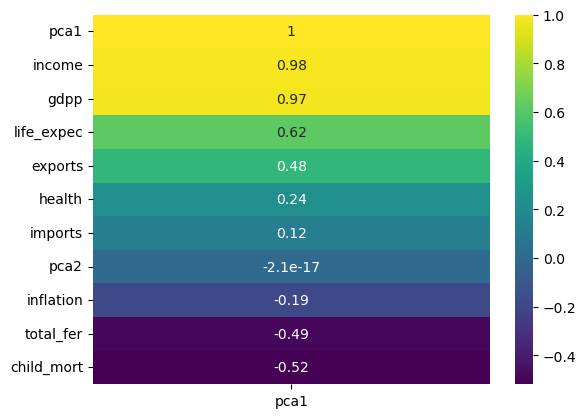

In [118]:
# heatmap with a single column  -> pca1
df_temp=df.copy()
df_temp["pca1"]=pca_2d[:, 0]
df_temp["pca2"]=pca_2d[:, 1]
pca1=df_temp.corr()['pca1'].sort_values(ascending=False)

# plot as heatmap single colum
import seaborn as sns
sns.heatmap(pca1.to_frame(), annot=True, cmap='viridis')







<Axes: >

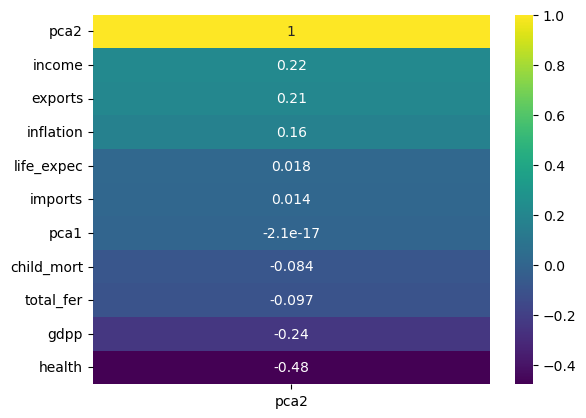

In [119]:
# heatmap with a single column  -> pca1

pca2=df_temp.corr()['pca2'].sort_values(ascending=False)

# plot as heatmap single colum
import seaborn as sns
sns.heatmap(pca2.to_frame(), annot=True, cmap='viridis')


In [117]:
# analysis of the clusters
k_means_df = df.copy()
k_means_df['cluster'] = kmeans.labels_

cluster_means=k_means_df.groupby('cluster').mean()

In [104]:
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
1,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625
2,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.156250,1.944687,35587.500000


In [105]:
# normalize the cluster_means inside the dataframe

for col in cluster_means.columns:
    cluster_means[col] = cluster_means[col]/cluster_means[col].max()
    
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,0.131433,1.000000,0.635358,1.000000,1.000000,0.713213,1.000000,0.541510,1.000000
1,1.000000,0.371885,0.704219,0.669690,0.106658,1.000000,0.845399,1.000000,0.067821
2,0.185694,0.518215,1.000000,0.671152,0.468267,0.377701,0.985932,0.595916,0.543795


In [106]:
# change child_mort to child_survival
cluster_means['child_survival'] = 1 - cluster_means['child_mort']

cluster_means.drop(['child_mort'], axis=1, inplace=True)


In [107]:
# change inflation to price_stability
cluster_means['price_stability'] = 1 - cluster_means['inflation']

cluster_means.drop(['inflation'], axis=1, inplace=True)

In [108]:
# change total_fer to low_reproduction
cluster_means['low_reproduction'] = 1 - cluster_means['total_fer']

cluster_means.drop(['total_fer'], axis=1, inplace=True)


<Axes: ylabel='cluster'>

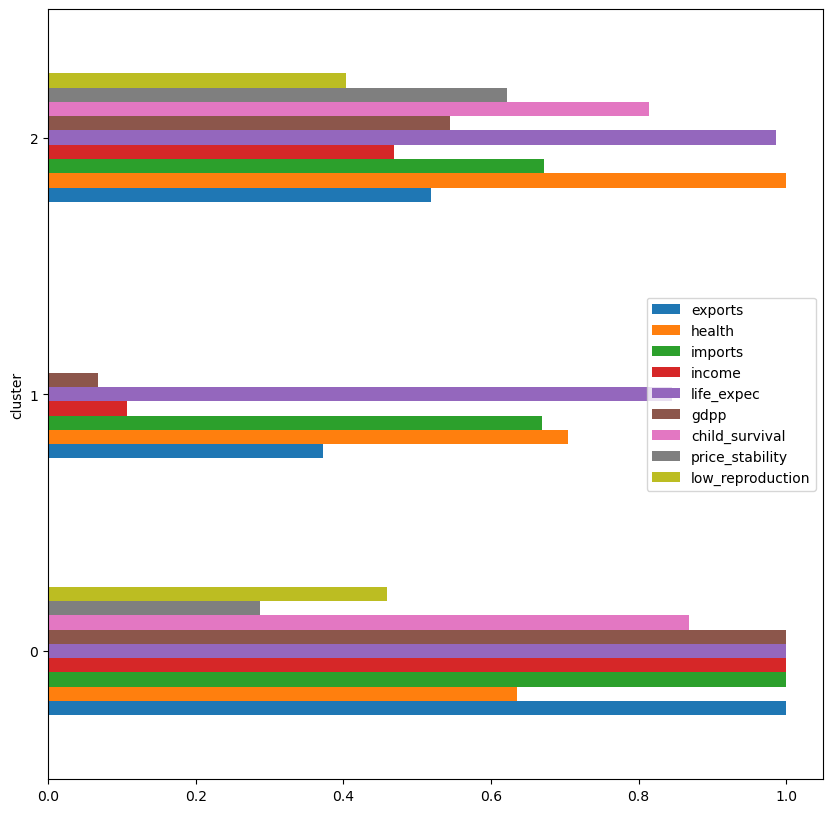

In [109]:
cluster_means.plot.barh(figsize=(10, 10))

In [110]:
countries[kmeans.labels_ == 0]

23          Brunei
82          Kuwait
91      Luxembourg
114         Norway
123          Qatar
133      Singapore
145    Switzerland
Name: country, dtype: object

In [111]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [112]:
# analyse with hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4).fit(df)
agg.labels_


array([2, 2, 2, 2, 3, 3, 2, 0, 0, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2,
       3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2,
       2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2, 3,
       2, 0, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 0, 0, 0, 3, 2, 2, 3, 2, 2, 2])

In [113]:
def cluster_analsysis(cluster_labels, df_to_analyse):
    local_df = df_to_analyse.copy()
    local_df['cluster'] = cluster_labels
    cluster_means=local_df.groupby('cluster').mean()
    for col in cluster_means.columns:
        cluster_means[col] = cluster_means[col]/cluster_means[col].max()
    cluster_means['child_survival'] = 1 - cluster_means['child_mort']
    cluster_means.drop(['child_mort'], axis=1, inplace=True)
    cluster_means['price_stability'] = 1 - cluster_means['inflation']
    cluster_means.drop(['inflation'], axis=1, inplace=True)
    cluster_means['low_reproduction'] = 1 - cluster_means['total_fer']
    cluster_means.drop(['total_fer'], axis=1, inplace=True)
    cluster_means.plot.barh(figsize=(10, 10))
    plt.show()
    
    for i in range(cluster_labels.max() + 1):
        print("Cluster ", i)
        print(countries[cluster_labels == i].head(5))
        print()
    
    
    

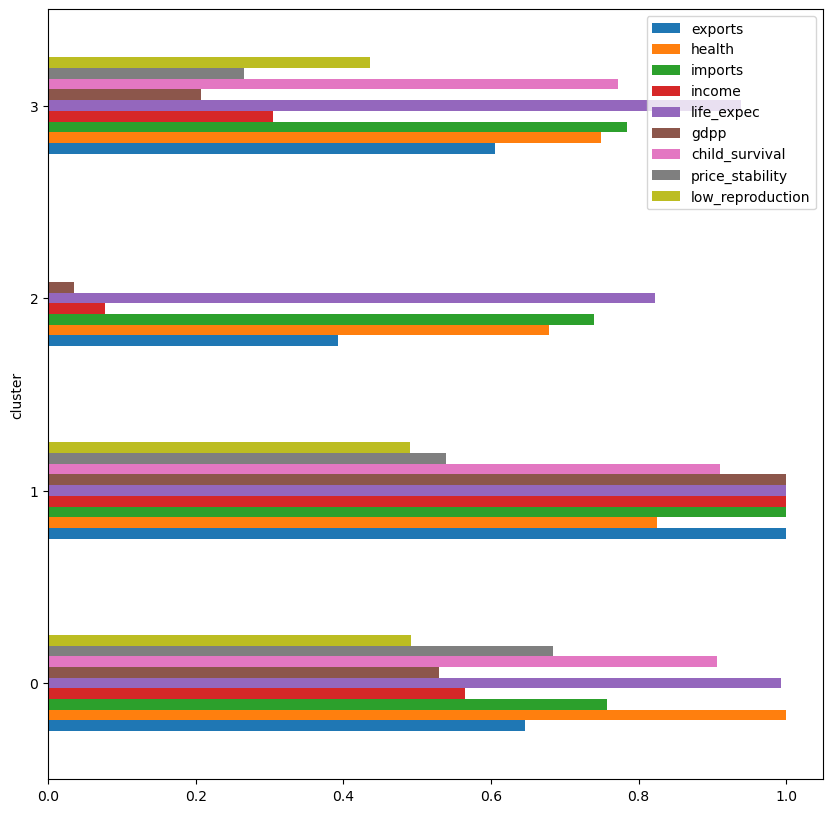

Cluster  0
7     Australia
8       Austria
15      Belgium
23       Brunei
29       Canada
Name: country, dtype: object

Cluster  1
91      Luxembourg
114         Norway
123          Qatar
145    Switzerland
Name: country, dtype: object

Cluster  2
0    Afghanistan
1        Albania
2        Algeria
3         Angola
6        Armenia
Name: country, dtype: object

Cluster  3
4     Antigua and Barbuda
5               Argentina
10                Bahamas
11                Bahrain
13               Barbados
Name: country, dtype: object



In [114]:
cluster_analsysis(agg.labels_, df)

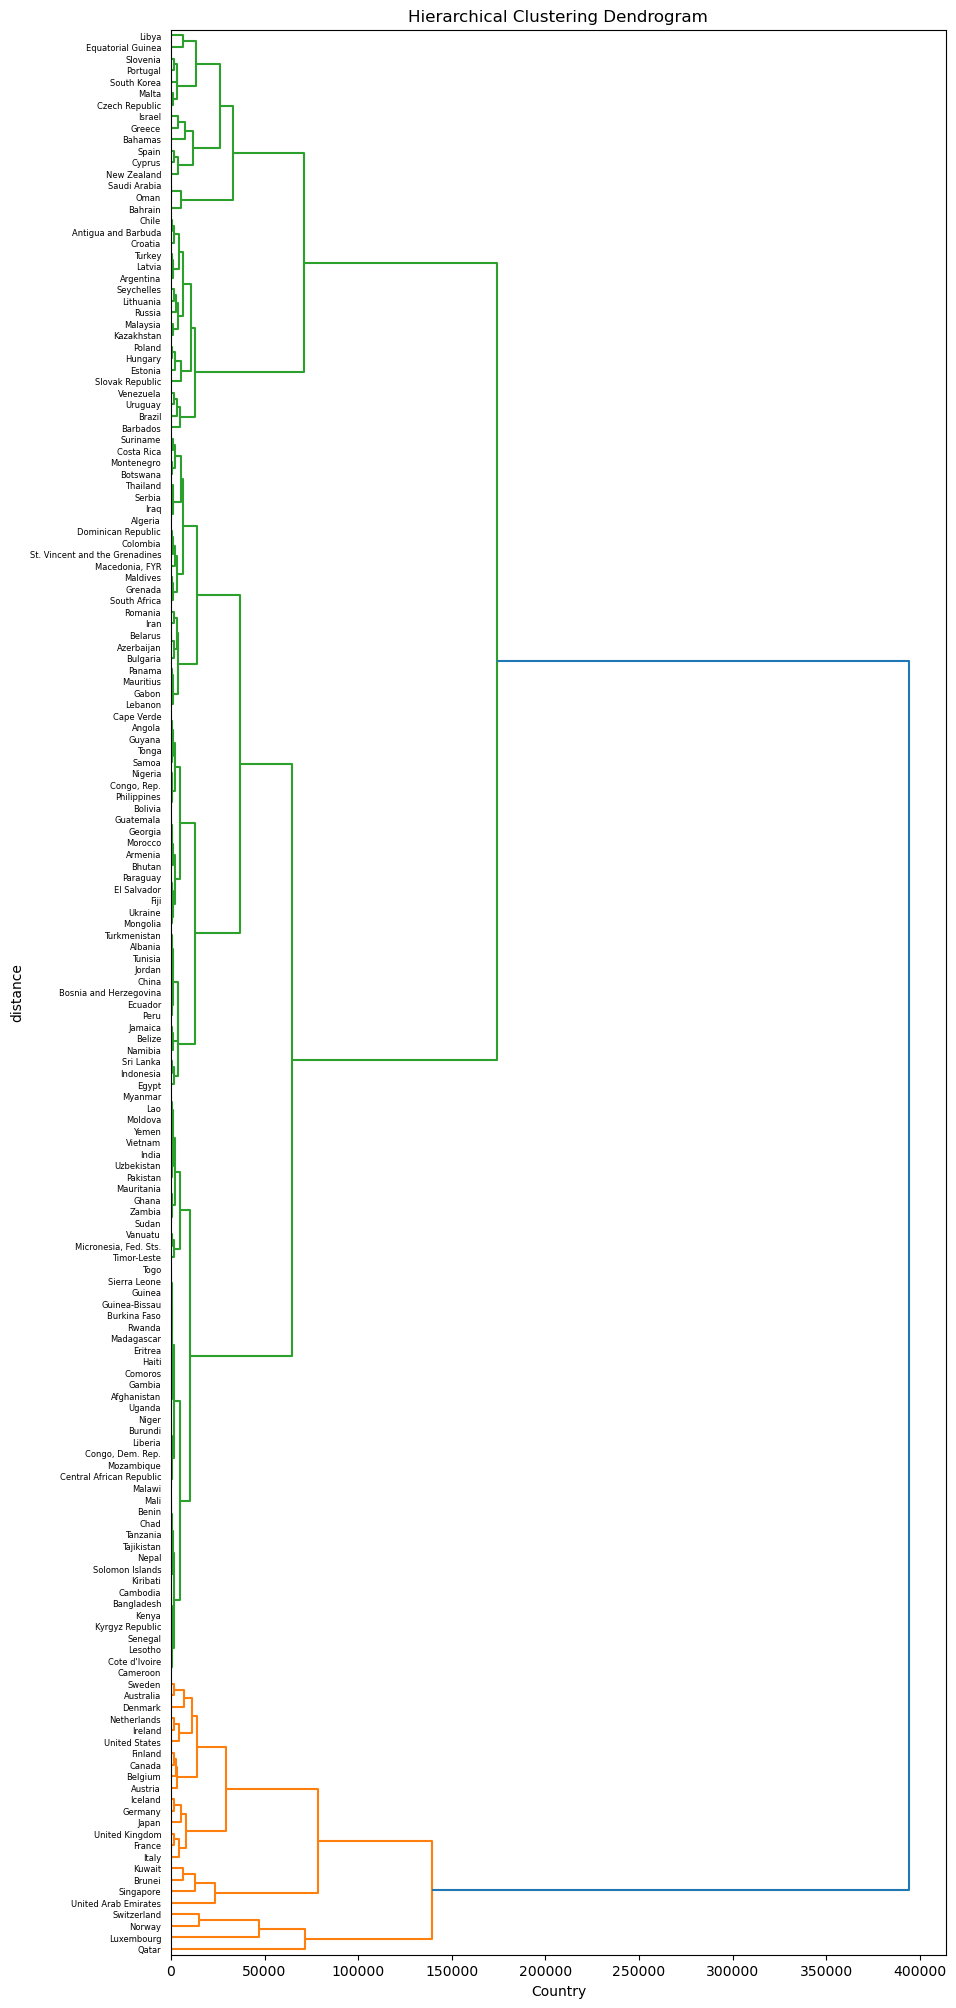

In [115]:
# plot hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df, 'ward')

plt.figure(figsize=(10, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('distance')
# show country labels
dendrogram(Z, leaf_font_size=6., leaf_label_func=lambda v: str(countries[v]), orientation='right')
plt.show()

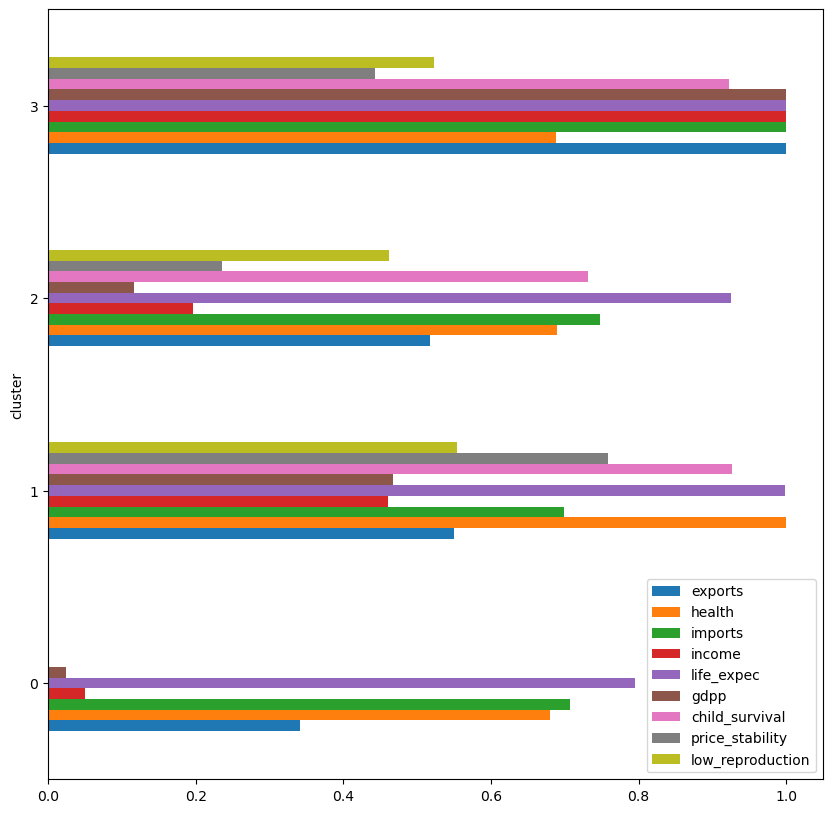

Cluster  0
0     Afghanistan
3          Angola
6         Armenia
9      Azerbaijan
12     Bangladesh
Name: country, dtype: object

Cluster  1
7     Australia
8       Austria
15      Belgium
23       Brunei
29       Canada
Name: country, dtype: object

Cluster  2
1                 Albania
2                 Algeria
4     Antigua and Barbuda
5               Argentina
10                Bahamas
Name: country, dtype: object

Cluster  3
91     Luxembourg
114        Norway
123         Qatar
Name: country, dtype: object



In [116]:
# another unsupervised learning algorithm
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(df)
gmm_labels = gmm.predict(df)

cluster_analsysis(gmm_labels, df)